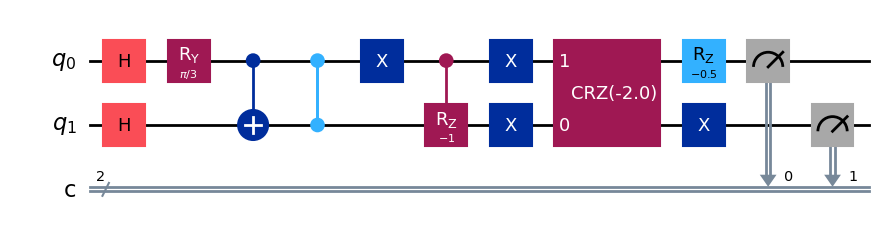

In [95]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

simulator = AerSimulator()

# Parámetros del sistema
omega = 1.0     # Frecuencia del oscilador
t = 1.0         # Tiempo de evolución
φ0 = -omega * t / 2         # Fase para |00⟩
φ1 = -3 * omega * t / 2     # Fase para |01⟩
φ2 = -5 * omega * t / 2     # Fase para |10⟩

# Crear circuito con 2 qubits y 2 bits clásicos
qc = QuantumCircuit(2, 2)

# 1. Preparar superposición inicial (puede incluir |11>)
qc.h([0,1])
qc.ry(np.pi/3, 0)

# 2. Mecanismo de destrucción de |11>
qc.cx(0, 1)          # Entrelaza para crear interferencia
qc.cz(0, 1)           # Aplica fase para cancelar |11>

# 3. Aplicación de fases con operaciones seguras
# --- Para |01> ---
qc.x(0)
qc.crz(φ1 - φ0, 0, 1)
qc.x(0)

# --- Para |10> ---
qc.x(1)
# Compuerta controlada mejorada que evita |11>
qc.append(QuantumCircuit(2).to_gate(label=f'CRZ({φ2-φ0})'), [1,0])
qc.x(1)

# 4. Fase global
qc.rz(φ0, 0)

# 5. Medición final
qc.measure([0,1], [0,1])

# Dibujar el circuito
qc.draw('mpl', fold=False)

In [96]:
from qiskit.visualization import plot_histogram

# Simular 1000 ejecuciones
job = simulator.run(qc, shots=100)
result = job.result()
counts = result.get_counts(qc)

print("Distribución final:")
print(counts)
plot_histogram(counts)


AerError: 'unknown instruction: circuit-200'

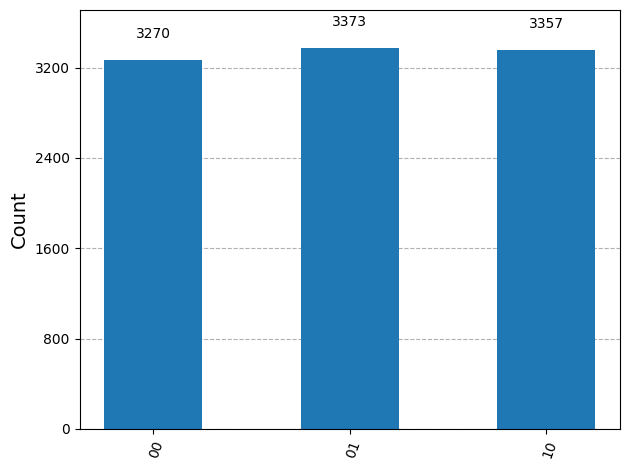

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)